In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('insurance.csv')

In [139]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 78.3 KB


In [141]:
df.shape

(1338, 7)

In [185]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03
mean,39.222139,0.495138,30.663452,1.095737,0.204936,-1.009747e-16
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.000374e+00
min,18.000000,0.000000,15.960000,0.000000,0.000000,-1.004247e+00
25%,27.000000,0.000000,26.290000,0.000000,0.000000,-7.048486e-01
50%,39.000000,0.000000,30.400000,1.000000,0.000000,-3.215773e-01
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.790883e-01
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.170826e+00


In [143]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [186]:
df['sex'].value_counts()

sex
0    675
1    662
Name: count, dtype: int64

In [145]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [146]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [147]:
df.drop_duplicates(keep='first',inplace=True)

C:\Users\tejas\AppData\Local\Temp\ipykernel_26772\2672565340.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges)


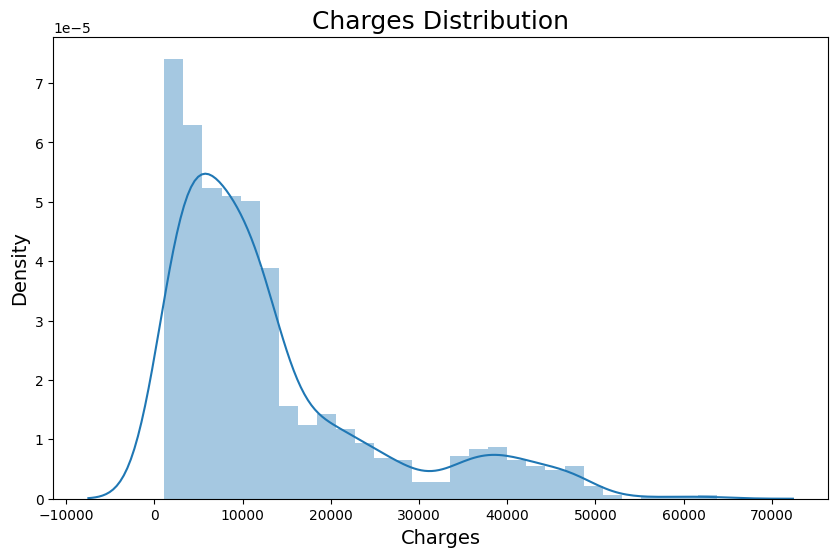

In [148]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges)
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

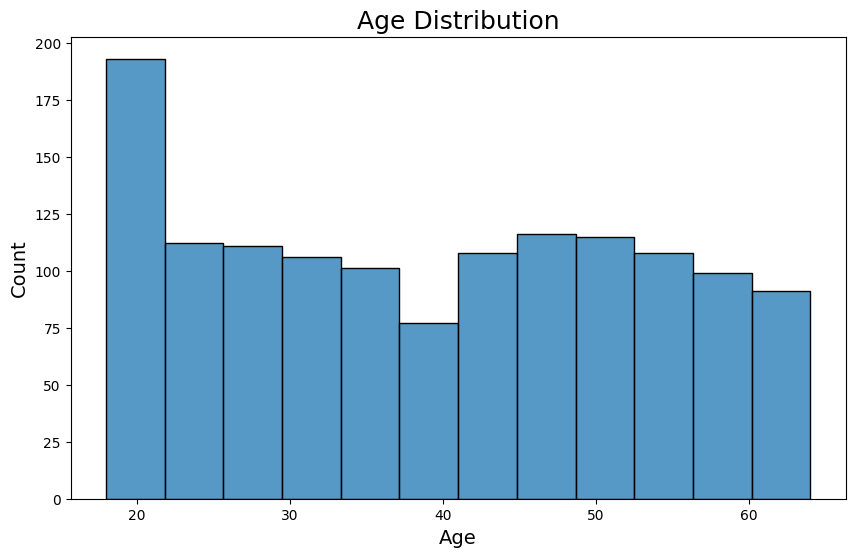

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

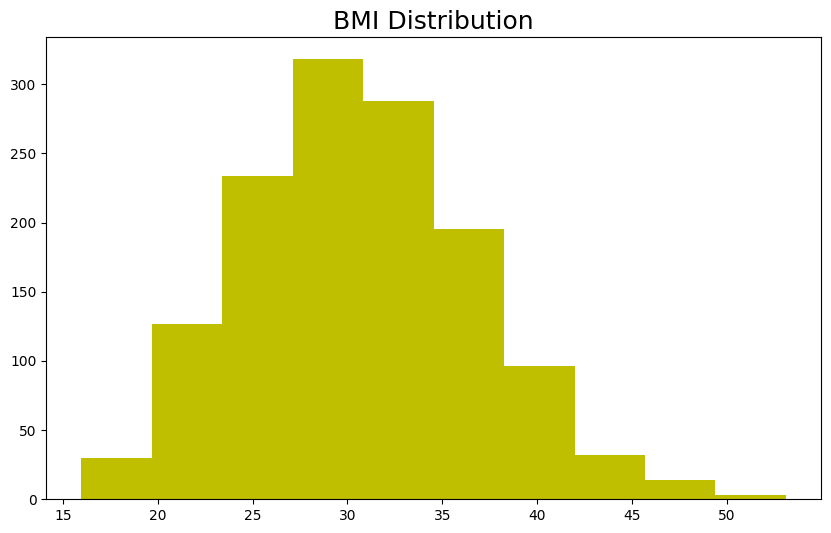

In [150]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

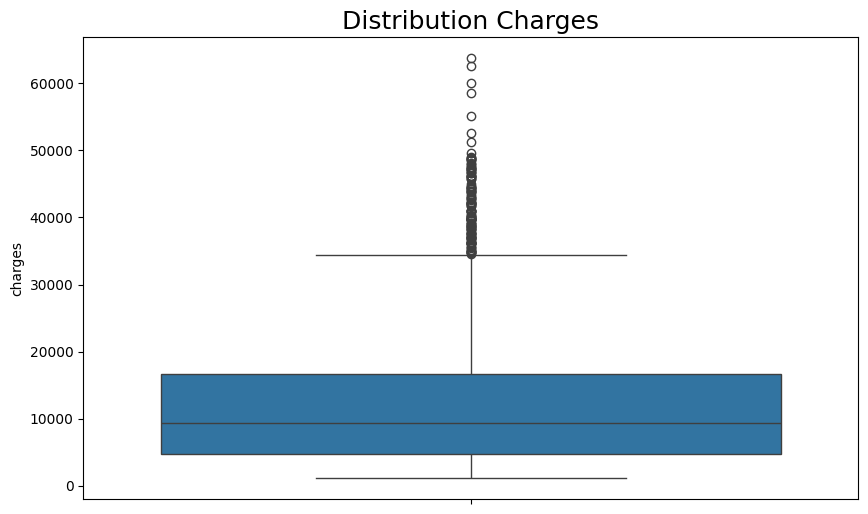

In [151]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

In [152]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


X -> 2D
y -> 1D

In [153]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## MSE formula: avg(y_a - y_p)^2 ##

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['charges'] = scaler.fit_transform(df[['charges']])

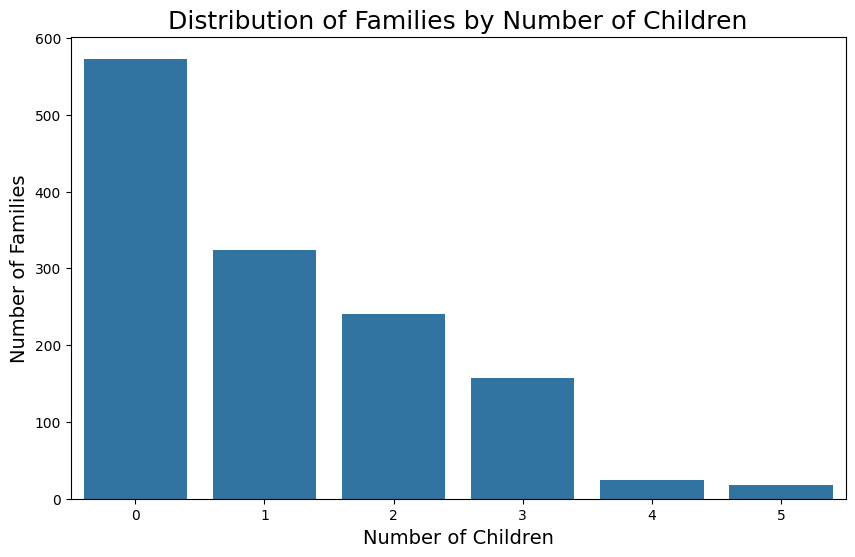

In [187]:
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df)
plt.title('Distribution of Families by Number of Children', size=18)
plt.xlabel('Number of Children', size=14)
plt.ylabel('Number of Families', size=14)
plt.show()

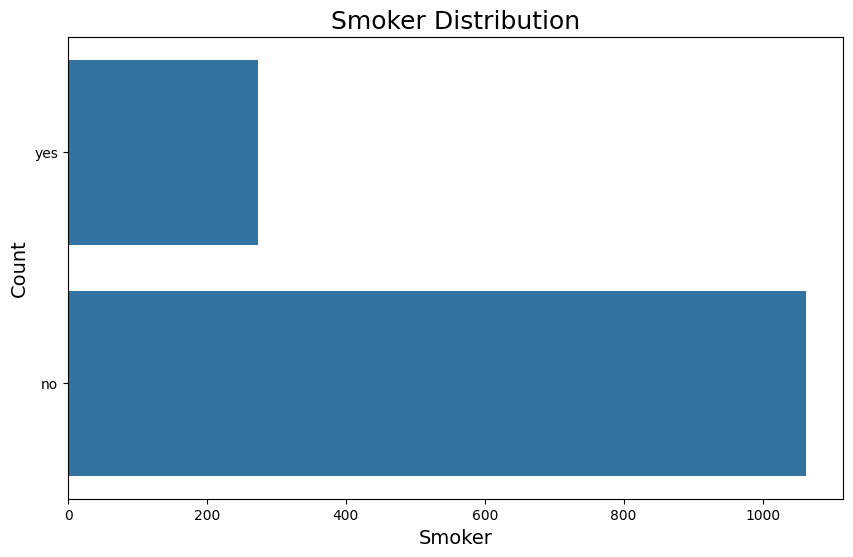

In [158]:
plt.figure(figsize = (10,6))
sns.countplot(df.smoker)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [159]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

C:\Users\tejas\AppData\Local\Temp\ipykernel_26772\3039026012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.region,palette='Blues')


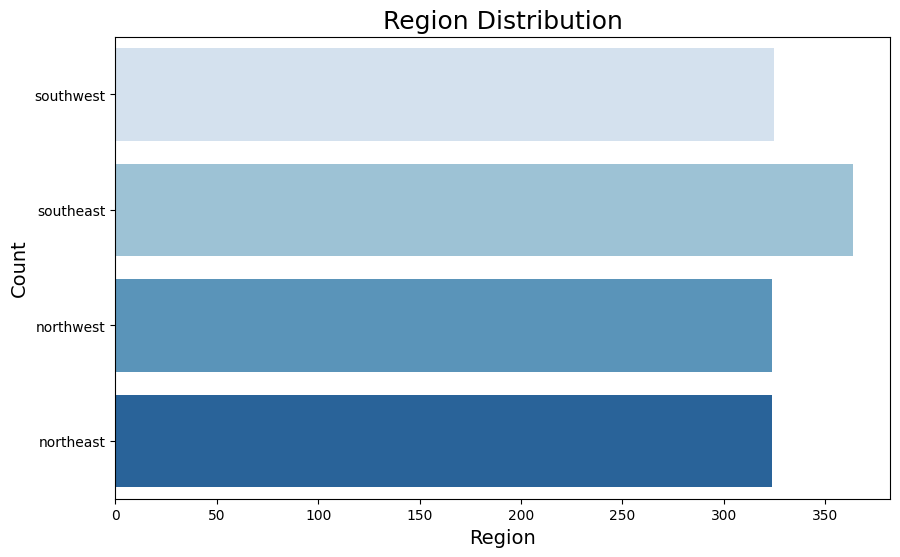

In [160]:
plt.figure(figsize = (10,6))
sns.countplot(df.region,palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [161]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,0.297857
1,18,male,33.770,1,no,southeast,-0.954381
2,28,male,33.000,3,no,southeast,-0.729373
3,33,male,22.705,0,no,northwest,0.719104
4,32,male,28.880,0,no,northwest,-0.777499


In [162]:
df.groupby('region')['charges'].agg(['count','mean'])

,count,mean
region,,
northeast,324,0.010513
northwest,324,-0.068420
southeast,364,0.120297
southwest,325,-0.077003


In [163]:
df.groupby('children')['charges'].agg(['count','mean'])

,count,mean
children,,
0,573,-0.073884
1,324,-0.045263
2,240,0.148230
3,157,0.171504
4,25,0.047212
5,18,-0.371151


In [164]:
df.groupby('smoker')['charges'].agg(['count','mean'])

,count,mean
smoker,,
no,1063,-0.399680
yes,274,1.550584


In [166]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [167]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,0.297857
1,18,0,33.770,1,no,southeast,-0.954381
2,28,0,33.000,3,no,southeast,-0.729373
3,33,0,22.705,0,no,northwest,0.719104
4,32,0,28.880,0,no,northwest,-0.777499


In [168]:
df['smoker'] = df['smoker'].map({'yes': 1,'no': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,0.297857
1,18,0,33.770,1,0,southeast,-0.954381
2,28,0,33.000,3,0,southeast,-0.729373
3,33,0,22.705,0,0,northwest,0.719104
4,32,0,28.880,0,0,northwest,-0.777499


In [169]:
df = pd.get_dummies(df,columns = ['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0.297857,False,False,False,True
1,18,0,33.770,1,0,-0.954381,False,False,True,False
2,28,0,33.000,3,0,-0.729373,False,False,True,False
3,33,0,22.705,0,0,0.719104,False,True,False,False
4,32,0,28.880,0,0,-0.777499,False,True,False,False


<Axes: >

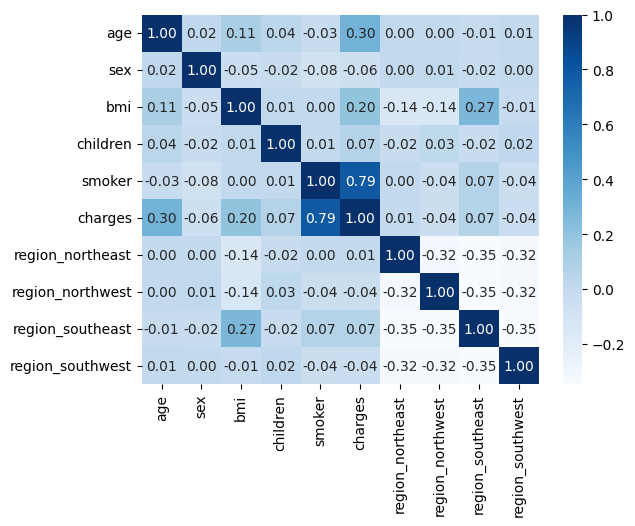

In [170]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [172]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0.297857,False,False,False,True
1,18,0,33.770,1,0,-0.954381,False,False,True,False
2,28,0,33.000,3,0,-0.729373,False,False,True,False
3,33,0,22.705,0,0,0.719104,False,True,False,False
4,32,0,28.880,0,0,-0.777499,False,True,False,False


In [173]:
X = df.drop(columns = ['charges'])
y = df['charges']

In [174]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,False,False,False,True
1,18,0,33.770,1,0,False,False,True,False
2,28,0,33.000,3,0,False,False,True,False
3,33,0,22.705,0,0,False,True,False,False
4,32,0,28.880,0,0,False,True,False,False


In [175]:
y.head()

0    0.297857
1   -0.954381
2   -0.729373
3    0.719104
4   -0.777499
Name: charges, dtype: float64

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [177]:
y_pred = model.predict(X_test)

### MSE ###

In [178]:
mse = np.mean((y_test - y_pred)**2)
mse

0.24208632037687308

### RMSE ###

In [179]:
rmse = np.sqrt(mse)
rmse

0.49202268278695555

### R2 Score ###

In [180]:
y_true = y_test

In [181]:
y_mean = np.mean(y_true)

In [182]:
r2_score = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - y_mean)**2))
r2_score

0.8069287081198011

## Sample 2D plot for demonstration ##

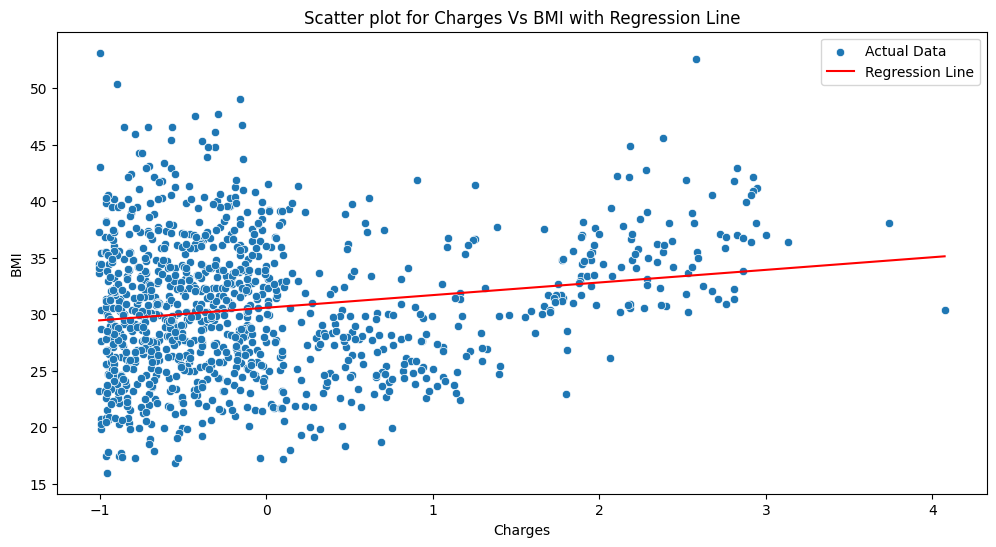

In [183]:
X_train, X_test, y_train, y_test = train_test_split(df[['charges']], df['bmi'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_range = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.figure(figsize=(12,6))
sns.scatterplot(x=X_train['charges'], y=y_train, label="Actual Data")
plt.plot(scaler.inverse_transform(X_range), y_pred, color='red', label="Regression Line")
plt.title('Scatter plot for Charges Vs BMI with Regression Line')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.legend()
plt.show()